In [70]:
import nltk
import string
import os
import pandas as pd
import re
from nltk.corpus import stopwords
import collections
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from scipy.spatial.distance import cosine
import numpy as np
import matplotlib.pyplot as plt
import sklearn.feature_extraction.text as text
from sklearn import decomposition
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import jaccard_similarity_score

# TF-IDF

In [73]:
stemmer = PorterStemmer()

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    text = re.sub(r"\W", " ", text)
    text = re.sub(r'\d+', '', text)
    tokens = nltk.word_tokenize(text)
    filtered_words = [word for word in tokens if word not in stopwords.words('english')]
    stems = stem_tokens(filtered_words, stemmer)
    return stems

def tf_idf_cosine(company = ""):
    token_dict = {}
    for file in sorted(os.listdir()):
        if ('txt' in file) & ('~' not in file) & (company in file):
            overview = open(file, 'r')
            text = overview.read()
            lowers = text.lower()
            no_punctuation = lowers.translate(string.punctuation)
            token_dict[file] = no_punctuation
            print(file)
            
    token_dict = collections.OrderedDict(sorted(token_dict.items()))
    tfidf = TfidfVectorizer(tokenizer=tokenize, stop_words='english')
    tfs = tfidf.fit_transform(token_dict.values())
    
    
    data = tfs.todense()
    i = 1
    j = 0
    change = []
    while i < data.shape[0]:
        change.append(cosine(data[i,:], data[j,:]))
        j += 1
        i += 1  
    return change


# TOP WORDS

In [143]:
token_dict = {}
stemmer = PorterStemmer()

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize_stem(text, stem = True):
    text = re.sub(r"\W", " ", text)
    text = re.sub(r'\d+', '', text)
    tokens = nltk.word_tokenize(text)
    filtered_words = [word for word in tokens if word not in stopwords.words('english')]
    filtered_words = stem_tokens(filtered_words, stemmer)
    return filtered_words

def tokenize(text, stem = True):
    text = re.sub(r"\W", " ", text)
    text = re.sub(r'\d+', '', text)
    tokens = nltk.word_tokenize(text)
    filtered_words = [word for word in tokens if word not in stopwords.words('english')]
    return filtered_words

def count_words(stem = True, company = ""):
    corpus = ['']
    nr_docs = 0
    for file in sorted(os.listdir()):
        if ('txt' in file) & ('~' not in file) & (company in file):
            overview = open(file, 'r')
            text = overview.read()
            lowers = text.lower()
            no_punctuation = lowers.translate(string.punctuation)
            corpus.append(no_punctuation)
            nr_docs += 1
    if stem == True:
        vectorizer = CountVectorizer(min_df=1, binary = True, tokenizer = tokenize_stem)
    else:
        vectorizer = CountVectorizer(min_df=1, binary = True, tokenizer = tokenize)
    X = vectorizer.fit_transform(corpus)
    return(vectorizer, X, nr_docs)


In [144]:
vec_stem, X_stem, nr_docs_s = count_words(stem = True)
vec, X, nr_docs = count_words(stem = False)

In [145]:
#NO STEM
data = X.todense()
doc_frequency = np.sum(data, axis = 0)/nr_docs
index = np.where(doc_frequency > 0.9)[1]
feature_names = vec.get_feature_names()
words = [feature_names[i] for i in list(index)]
print("Top document frequent words without stemming")
print("\n")
print(words)
print("\n")
print("\n")

#WITH STEM
data2 = X_stem.todense()
doc_frequency2 = np.sum(data2, axis = 0)/nr_docs
index2 = np.where(doc_frequency2 > 0.9)[1]
feature_names2 = vec_stem.get_feature_names()
words2 = [feature_names2[i] for i in list(index2)]
print("Top document frequent words without stemming")
print("\n")
print(words2)

Top document frequent words without stemming


['actions', 'adversely', 'affect', 'affected', 'although', 'availability', 'cash', 'certain', 'changes', 'competition', 'competitive', 'condition', 'conditions', 'consumer', 'continued', 'control', 'cost', 'costs', 'could', 'current', 'decline', 'demand', 'due', 'economic', 'effect', 'events', 'existing', 'experience', 'factors', 'failure', 'financial', 'fixed', 'global', 'greater', 'growth', 'impact', 'including', 'increase', 'increased', 'industry', 'issues', 'less', 'levels', 'lower', 'maintain', 'many', 'market', 'markets', 'may', 'new', 'operations', 'order', 'particularly', 'price', 'products', 'profitability', 'quality', 'relating', 'result', 'results', 'risk', 'risks', 'sales', 'significant', 'significantly', 'substantial', 'success', 'time', 'trade', 'us', 'value', 'volatility', 'volume', 'well', 'would']




Top document frequent words without stemming


['action', 'advers', 'affect', 'although', 'anticip', 'applic', 'avail', 'ca

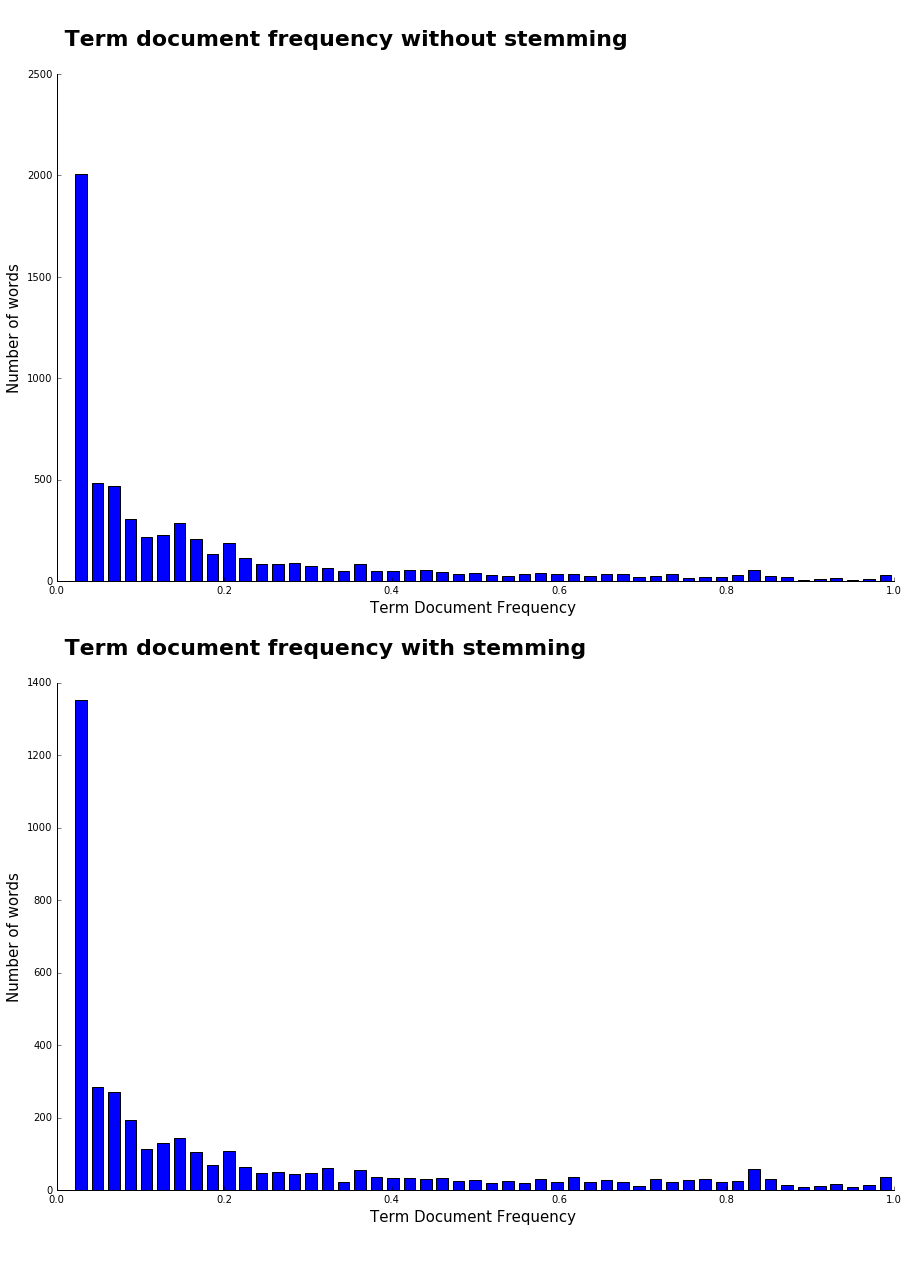

In [146]:
%matplotlib inline

fig = plt.figure(figsize=(15,20))

ax1 = fig.add_subplot(211)
hist, bins = np.histogram(doc_frequency, bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.ylabel("Number of words", size = 15)
plt.xlabel("Term Document Frequency \n \n", size = 15)
plt.title("\n Term document frequency without stemming\n", fontsize = 22, loc = 'left', fontweight='bold')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')

ax2 = fig.add_subplot(212)
hist, bins = np.histogram(doc_frequency2, bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.ylabel("Number of words", size = 15)
plt.xlabel("Term Document Frequency \n \n", size = 15)
plt.title("\n \n \n \n Term document frequency with stemming\n", fontsize = 22, loc = 'left', fontweight='bold')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('bottom')



# JACCARD & TF COSINE DISTANCE

### Word frequency by doc

In [74]:
token_dict = {}
stemmer = PorterStemmer()

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize_stem(text, stem = True):
    text = re.sub(r"\W", " ", text)
    text = re.sub(r'\d+', '', text)
    tokens = nltk.word_tokenize(text)
    filtered_words = [word for word in tokens if word not in stopwords.words('english')]
    filtered_words = stem_tokens(filtered_words, stemmer)
    return filtered_words

def tokenize(text, stem = True):
    text = re.sub(r"\W", " ", text)
    text = re.sub(r'\d+', '', text)
    tokens = nltk.word_tokenize(text)
    filtered_words = [word for word in tokens if word not in stopwords.words('english')]
    return filtered_words

def jaccard(stem = True, company = "", freq = 0.9, overlap = True, words = True):
    corpus = []
    nr_docs = 0
    for file in sorted(os.listdir()):
        if ('txt' in file) & ('~' not in file) & (company in file):
            overview = open(file, 'r')
            text = overview.read()
            lowers = text.lower()
            no_punctuation = lowers.translate(string.punctuation)
            corpus.append(no_punctuation)
            nr_docs += 1
            #print(file)
    if stem == True:
        vectorizer = CountVectorizer(min_df=1, binary = True, tokenizer = tokenize_stem)
    else:
        vectorizer = CountVectorizer(min_df=1, binary = True, tokenizer = tokenize)
    X = vectorizer.fit_transform(corpus)
    data = X.todense()
    doc_frequency = np.sum(data, axis = 0)/nr_docs
    index = np.where(doc_frequency > freq)[1]
    feature_names = vectorizer.get_feature_names()
    words = [feature_names[i] for i in list(index)]
    if words == True:
        print(words)
    if overlap == True:
        data = np.delete(data, index, axis = 1)
    i = 1
    j = 0
    change = []
    while i < (data.shape[0]):
        change.append(1 - jaccard_similarity_score(data[i,:], data[j,:]))
        j += 1
        i += 1    
    return(change)



def tf_cosine(stem = True, company = ""):
    corpus = []
    nr_docs = 0
    for file in sorted(os.listdir()):
        if ('txt' in file) & ('~' not in file) & (company in file):
            overview = open(file, 'r')
            text = overview.read()
            lowers = text.lower()
            no_punctuation = lowers.translate(string.punctuation)
            corpus.append(no_punctuation)
            nr_docs += 1
            #print(file)
    if stem == True:
        vectorizer = CountVectorizer(min_df=1, binary = False, tokenizer = tokenize_stem)
    else:
        vectorizer = CountVectorizer(min_df=1, binary = False, tokenizer = tokenize)
    
    X = vectorizer.fit_transform(corpus)
    data = X.todense()
    i = 1
    j = 0
    change = []
    while i < (data.shape[0]):
        change.append(cosine(data[i,:], data[j,:]))
        j += 1
        i += 1    
    return(change)



# Amazon

In [99]:
tf= tf_cosine(company = 'amazon')
jac_overl = jaccard(company = 'amazon', words = True)
tfidf= tf_idf_cosine(company='amazon')
jac = jaccard(company = 'amazon', overlap=False, words = False)

2006_amazon.txt
2007_amazon.txt
2008_amazon.txt
2009_amazon.txt
2010_amazon.txt
2011_amazon.txt
2012_amazon.txt
2013_amazon.txt
2014_amazon.txt
2015_amazon.txt
2016_amazon.txt


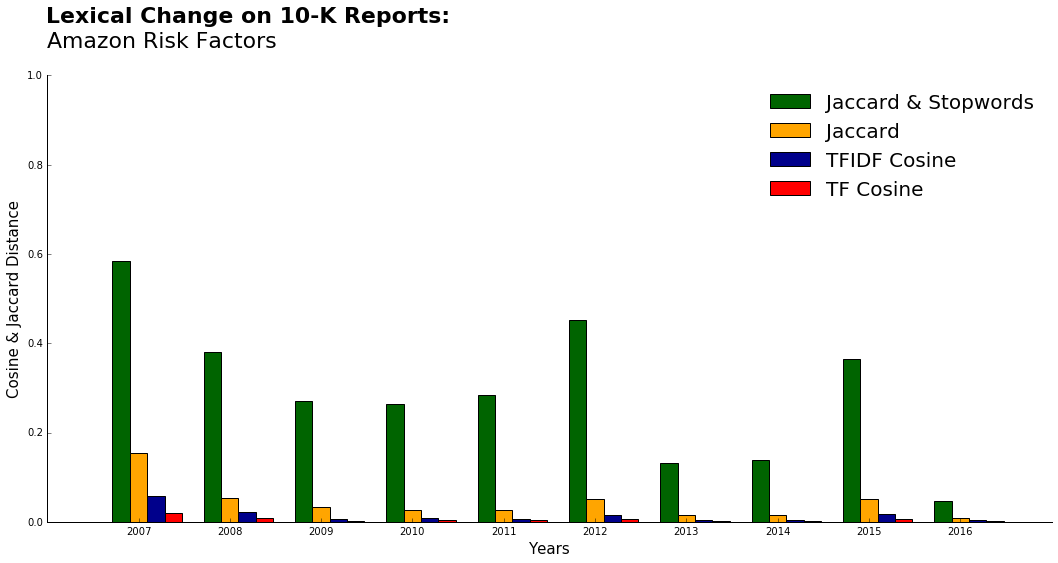

In [103]:
%matplotlib inline
years = ['2007','2008','2009','2010','2011','2012','2013','2014','2015', '2016']
x_pos = np.arange(len(years))

fig = plt.figure(figsize=(18, 8))  
w = 0.19
ax = plt.subplot(111)
bar1 = ax.bar(x_pos - w, jac_overl, width = w, align = 'center', color="darkgreen")
bar2 = ax.bar(x_pos, jac, width = w, align = 'center', color="orange")
bar3 =ax.bar(x_pos + w, tfidf, width = w, align = 'center', color="darkblue")
bar4 =ax.bar(x_pos + 2*w, tf, width = w, align = 'center', color="red")

plt.xticks(x_pos, years)
plt.ylabel("Cosine & Jaccard Distance", size = 15)
plt.xlabel("Years", size = 15)
plt.suptitle("Lexical Change on 10-K Reports:", x = 0.28, y = 1.02, fontsize = 22, fontweight = 'bold')
plt.title("Amazon Risk Factors \n", fontsize = 22, loc = 'left')
plt.ylim([0,1])
plt.xlim([-1, 10])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.legend((bar1[0], bar2[0], bar3[0], bar4[0]), ('Jaccard & Stopwords', 
                                                 'Jaccard', 
                                                 'TFIDF Cosine',
                                                 'TF Cosine'), fontsize = 20,
         frameon=False)

# Morgan Stanley

In [104]:
tf= tf_cosine(company = 'morgan')
jac_overl = jaccard(company = 'morgan')
tfidf= tf_idf_cosine(company='morgan')
jac = jaccard(company = 'morgan', overlap=False, words = False)

morgan_risk_895421_2007.txt
morgan_risk_895421_2008.txt
morgan_risk_895421_2009.txt
morgan_risk_895421_2010.txt
morgan_risk_895421_2011.txt
morgan_risk_895421_2012.txt
morgan_risk_895421_2013.txt
morgan_risk_895421_2014.txt
morgan_risk_895421_2015.txt


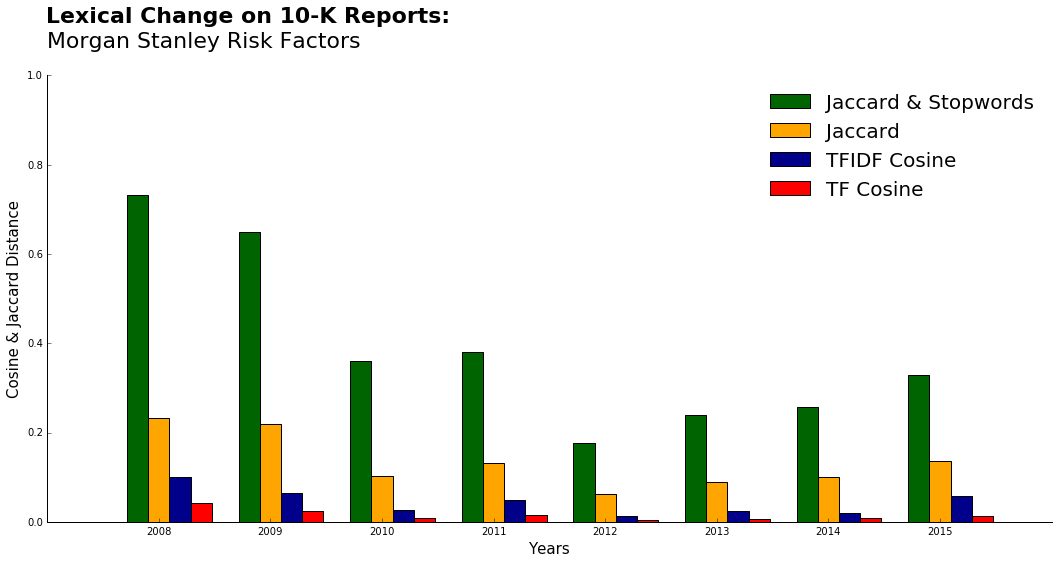

In [108]:
%matplotlib inline
years = ['2008','2009','2010','2011','2012','2013','2014','2015']
x_pos = np.arange(len(years))

fig = plt.figure(figsize=(18, 8))  
w = 0.19
ax = plt.subplot(111)
bar1 = ax.bar(x_pos - w, jac_overl, width = w, align = 'center', color="darkgreen")
bar2 = ax.bar(x_pos, jac, width = w, align = 'center', color="orange")
bar3 =ax.bar(x_pos + w, tfidf, width = w, align = 'center', color="darkblue")
bar4 =ax.bar(x_pos + 2*w, tf, width = w, align = 'center', color="red")

plt.xticks(x_pos, years)
plt.ylabel("Cosine & Jaccard Distance", size = 15)
plt.xlabel("Years", size = 15)
plt.suptitle("Lexical Change on 10-K Reports:", x = 0.28, y = 1.02, fontsize = 22, fontweight = 'bold')
plt.title("Morgan Stanley Risk Factors \n", fontsize = 22, loc = 'left')
plt.ylim([0,1])
plt.xlim([-1, 8])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.legend((bar1[0], bar2[0], bar3[0], bar4[0]), ('Jaccard & Stopwords', 
                                                 'Jaccard', 
                                                 'TFIDF Cosine',
                                                 'TF Cosine'), fontsize = 20,
         frameon=False)

# Apple

In [112]:
tf= tf_cosine(company = 'apple')
jac_overl = jaccard(company = 'apple')
tfidf= tf_idf_cosine(company='apple')
jac = jaccard(company = 'apple', overlap=False, words = False)

apple_risk_320193_2006.txt
apple_risk_320193_2009.txt
apple_risk_320193_2010.txt
apple_risk_320193_2011.txt
apple_risk_320193_2012.txt
apple_risk_320193_2013.txt
apple_risk_320193_2014.txt
apple_risk_320193_2015.txt


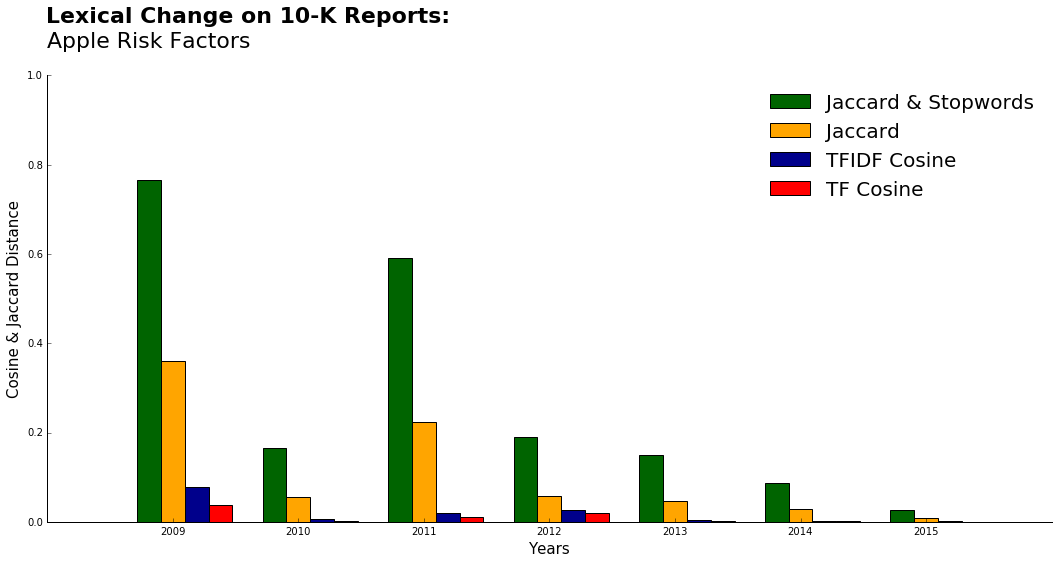

In [114]:
%matplotlib inline
years = ['2009','2010','2011','2012','2013','2014','2015']
x_pos = np.arange(len(years))

fig = plt.figure(figsize=(18, 8))  
w = 0.19
ax = plt.subplot(111)
bar1 = ax.bar(x_pos - w, jac_overl, width = w, align = 'center', color="darkgreen")
bar2 = ax.bar(x_pos, jac, width = w, align = 'center', color="orange")
bar3 =ax.bar(x_pos + w, tfidf, width = w, align = 'center', color="darkblue")
bar4 =ax.bar(x_pos + 2*w, tf, width = w, align = 'center', color="red")

plt.xticks(x_pos, years)
plt.ylabel("Cosine & Jaccard Distance", size = 15)
plt.xlabel("Years", size = 15)
plt.suptitle("Lexical Change on 10-K Reports:", x = 0.28, y = 1.02, fontsize = 22, fontweight = 'bold')
plt.title("Apple Risk Factors \n", fontsize = 22, loc = 'left')
plt.ylim([0,1])
plt.xlim([-1, 7])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.legend((bar1[0], bar2[0], bar3[0], bar4[0]), ('Jaccard & Stopwords', 
                                                 'Jaccard', 
                                                 'TFIDF Cosine',
                                                 'TF Cosine'), fontsize = 20,
         frameon=False)

# Ford

In [115]:
tf= tf_cosine(company = 'ford')
jac_overl = jaccard(company = 'ford')
tfidf= tf_idf_cosine(company='ford')
jac = jaccard(company = 'ford', overlap=False, words = False)

2007_ford.txt
2008_ford.txt
2009_ford.txt
2010_ford.txt
2011_ford.txt
2012_ford.txt
2013_ford.txt
2014_ford.txt
2015_ford.txt


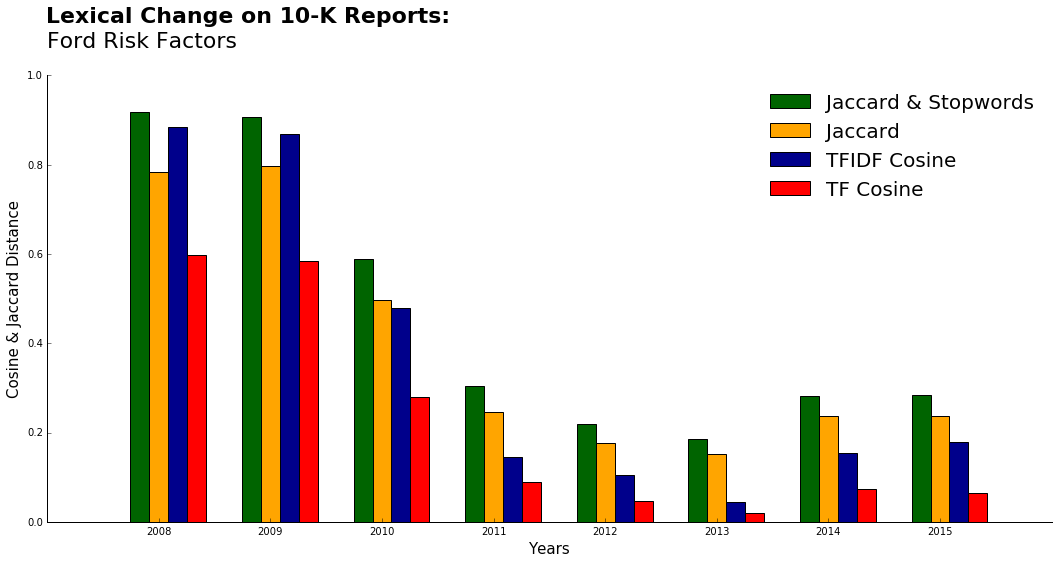

In [118]:
%matplotlib inline
years = ['2008','2009','2010','2011','2012','2013','2014','2015']
x_pos = np.arange(len(years))

fig = plt.figure(figsize=(18, 8))  
w = 0.17
ax = plt.subplot(111)
bar1 = ax.bar(x_pos - w, jac_overl, width = w, align = 'center', color="darkgreen")
bar2 = ax.bar(x_pos, jac, width = w, align = 'center', color="orange")
bar3 =ax.bar(x_pos + w, tfidf, width = w, align = 'center', color="darkblue")
bar4 =ax.bar(x_pos + 2*w, tf, width = w, align = 'center', color="red")

plt.xticks(x_pos, years)
plt.ylabel("Cosine & Jaccard Distance", size = 15)
plt.xlabel("Years", size = 15)
plt.suptitle("Lexical Change on 10-K Reports:", x = 0.28, y = 1.02, fontsize = 22, fontweight = 'bold')
plt.title("Ford Risk Factors \n", fontsize = 22, loc = 'left')
plt.ylim([0,1])
plt.xlim([-1, 8])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.legend((bar1[0], bar2[0], bar3[0], bar4[0]), ('Jaccard & Stopwords', 
                                                 'Jaccard', 
                                                 'TFIDF Cosine',
                                                 'TF Cosine'), fontsize = 20,
         frameon=False)

# Pfizer

In [124]:
tf= tf_cosine(company = 'pfizer')
jac_overl = jaccard(company = 'pfizer')
tfidf= tf_idf_cosine(company='pfizer')
jac = jaccard(company = 'pfizer', overlap=False, words = False)

pfizer_risk_78003_2007.txt
pfizer_risk_78003_2009.txt
pfizer_risk_78003_2010.txt
pfizer_risk_78003_2011.txt
pfizer_risk_78003_2012.txt
pfizer_risk_78003_2013.txt
pfizer_risk_78003_2015.txt


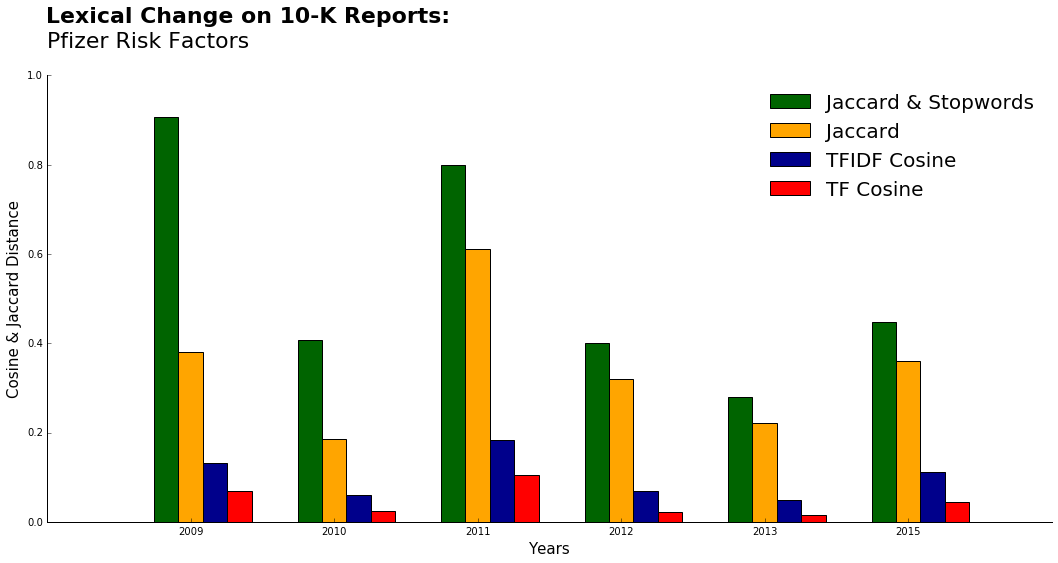

In [129]:
%matplotlib inline
years = ['2009','2010','2011','2012','2013','2015']
x_pos = np.arange(len(years))

fig = plt.figure(figsize=(18, 8))  
w = 0.17
ax = plt.subplot(111)
bar1 = ax.bar(x_pos - w, jac_overl, width = w, align = 'center', color="darkgreen")
bar2 = ax.bar(x_pos, jac, width = w, align = 'center', color="orange")
bar3 =ax.bar(x_pos + w, tfidf, width = w, align = 'center', color="darkblue")
bar4 =ax.bar(x_pos + 2*w, tf, width = w, align = 'center', color="red")

plt.xticks(x_pos, years)
plt.ylabel("Cosine & Jaccard Distance", size = 15)
plt.xlabel("Years", size = 15)
plt.suptitle("Lexical Change on 10-K Reports:", x = 0.28, y = 1.02, fontsize = 22, fontweight = 'bold')
plt.title("Pfizer Risk Factors \n", fontsize = 22, loc = 'left')
plt.ylim([0,1])
plt.xlim([-1, 6])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.legend((bar1[0], bar2[0], bar3[0], bar4[0]), ('Jaccard & Stopwords', 
                                                 'Jaccard', 
                                                 'TFIDF Cosine',
                                                 'TF Cosine'), fontsize = 20,
         frameon=False)

# Netflix

In [133]:
tf= tf_cosine(company = 'netflix')
jac_overl = jaccard(company = 'netflix')
tfidf= tf_idf_cosine(company='netflix')
jac = jaccard(company = 'netflix', overlap=False, words = False)

netflix_risks_1065280_2007.txt
netflix_risks_1065280_2008.txt
netflix_risks_1065280_2009.txt
netflix_risks_1065280_2010.txt
netflix_risks_1065280_2011.txt
netflix_risks_1065280_2013.txt
netflix_risks_1065280_2014.txt
netflix_risks_1065280_2015.txt


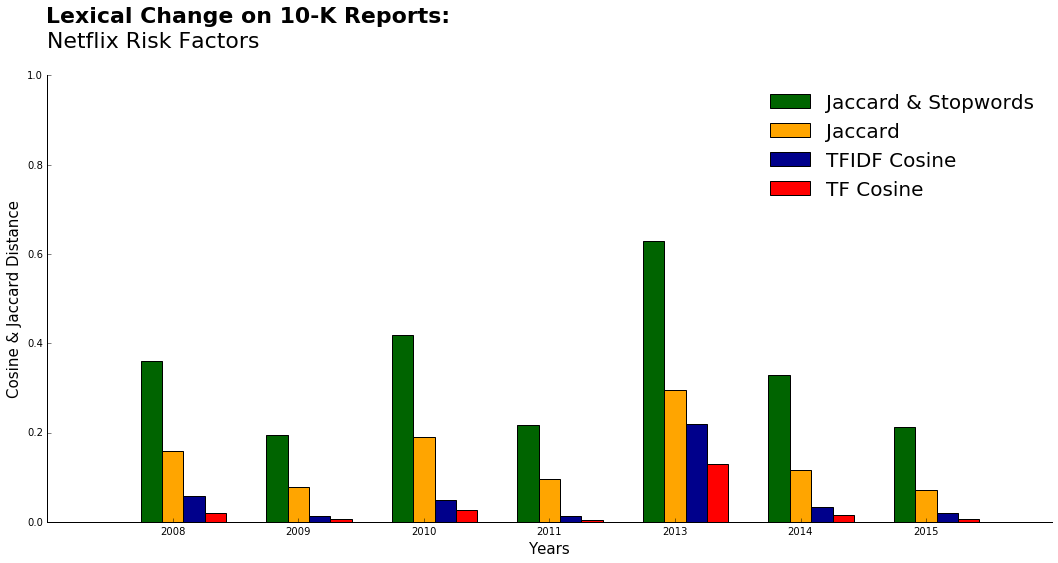

In [142]:
%matplotlib inline
years = ['2008','2009','2010','2011','2013', '2014','2015']
x_pos = np.arange(len(years))

fig = plt.figure(figsize=(18, 8))  
w = 0.17
ax = plt.subplot(111)
bar1 = ax.bar(x_pos - w, jac_overl, width = w, align = 'center', color="darkgreen")
bar2 = ax.bar(x_pos, jac, width = w, align = 'center', color="orange")
bar3 =ax.bar(x_pos + w, tfidf, width = w, align = 'center', color="darkblue")
bar4 =ax.bar(x_pos + 2*w, tf, width = w, align = 'center', color="red")

plt.xticks(x_pos, years)
plt.ylabel("Cosine & Jaccard Distance", size = 15)
plt.xlabel("Years", size = 15)
plt.suptitle("Lexical Change on 10-K Reports:", x = 0.28, y = 1.02, fontsize = 22, fontweight = 'bold')
plt.title("Netflix Risk Factors \n", fontsize = 22, loc = 'left')
plt.ylim([0,1])
plt.xlim([-1, 7])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.legend((bar1[0], bar2[0], bar3[0], bar4[0]), ('Jaccard & Stopwords', 
                                                 'Jaccard', 
                                                 'TFIDF Cosine',
                                                 'TF Cosine'), fontsize = 20,
         frameon=False)